# Лабораторная работа 2. Исследование надёжности системы с последовательно и параллельно соединёнными невосстанавливаемыми элементами, отказы которых являются независимыми


Вариант 12

Лазарев Эдуард Артемович
N33471

In [1]:
from matplotlib import pyplot as plt
from scipy import integrate
import numpy as np

Введём начальные значения для данного варианта.

In [2]:
# Варианты кол-ва элементов в системе.
N = (4, 7, 11)

# Варианты интенсивностей отказов элементов.
Lambda = (1 / 300, 1 / 400)

Определим функцию для подсчёта индикаторов надёжности системы.

In [3]:
def calc_consistent(n: int, lambda_: float) -> dict:
    """Расчёт функций для последовательного соединения"""
    
    # Функция надёжности.
    def p_c(t):
        return np.exp(-n * lambda_ * t)
    
    # Функция отказа.
    def q_c(t):
        return 1 - p_c(t)
    
    # Среднее время безотказной работы.
    T_c = 1 / (n * lambda_)
    
    return {
        "p_c": p_c,
        "q_c": q_c,
        "T_c": T_c,
    }
    
def calc_parallel(n: int, lambda_: float) -> dict:
    """Расчёт функций для параллельного соединения"""
    
    # Функция надёжности.
    def p_c(t):
        return 1 - q_c(t)
    
    # Функция отказа.
    def q_c(t):
        return (1 - np.exp(-lambda_ * t)) ** n
    
    # Среднее время безотказной работы.
    T_c = integrate.quad(p_c, 0, np.inf)[0]
    
    return {
        "p_c": p_c,
        "q_c": q_c,
        "T_c": T_c,
    }

Определим функцию для постройки графиков.

In [4]:
def plot(func, to_t: float, title: str):

    fig = plt.figure()
    
    plt.title(title)
    
    xs = np.arange(0, to_t, 0.05)
    ys = [func(t) for t in xs]
        
    plt.plot(xs, ys)
    fig.savefig(f"images/{title}.png")

Выполним расчёты для разных n и lambda.

Последовательное соединение.

n = 4

lambda = 1 / 300

Среднее время безотказной работы: T_C=75.00


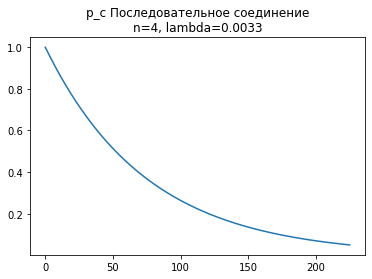

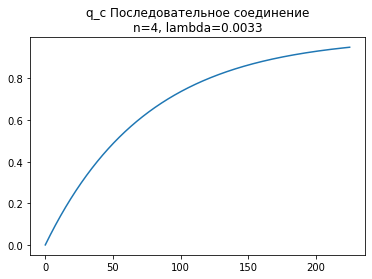

In [5]:
n = N[0]
lambda_ = Lambda[0]

funcs = calc_consistent(n, lambda_)

print(f"Среднее время безотказной работы: T_C={funcs['T_c']:.2f}")
plot(funcs["p_c"], funcs["T_c"] * 3, f"p_c Последовательное соединение\nn={n}, lambda={lambda_:.2}")
plot(funcs["q_c"], funcs["T_c"] * 3, f"q_c Последовательное соединение\nn={n}, lambda={lambda_:.2}")

Параллельное соединение.

n = 4

lambda = 1 / 300

Среднее время безотказной работы: T_C=625.00


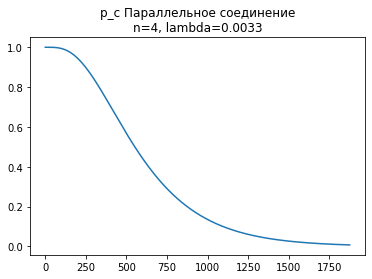

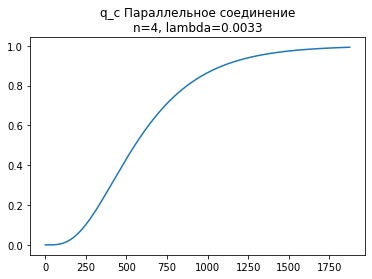

In [6]:
n = N[0]
lambda_ = Lambda[0]

funcs = calc_parallel(n, lambda_)

print(f"Среднее время безотказной работы: T_C={funcs['T_c']:.2f}")
plot(funcs["p_c"], funcs["T_c"] * 3, f"p_c Параллельное соединение\nn={n}, lambda={lambda_:.2}")
plot(funcs["q_c"], funcs["T_c"] * 3, f"q_c Параллельное соединение\nn={n}, lambda={lambda_:.2}")

Последовательное соединение.

n = 4

lambda = 1 / 400

Среднее время безотказной работы: T_C=100.00


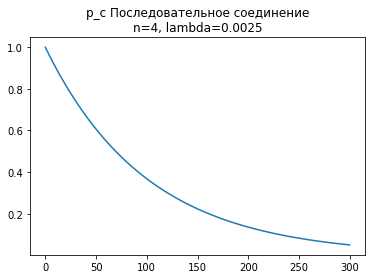

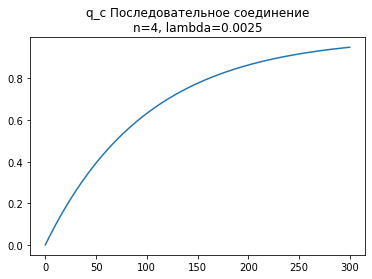

In [7]:
n = N[0]
lambda_ = Lambda[1]

funcs = calc_consistent(n, lambda_)

print(f"Среднее время безотказной работы: T_C={funcs['T_c']:.2f}")
plot(funcs["p_c"], funcs["T_c"] * 3, f"p_c Последовательное соединение\nn={n}, lambda={lambda_:.2}")
plot(funcs["q_c"], funcs["T_c"] * 3, f"q_c Последовательное соединение\nn={n}, lambda={lambda_:.2}")

Параллельное соединение.

n = 4

lambda = 1 / 400

Среднее время безотказной работы: T_C=833.33


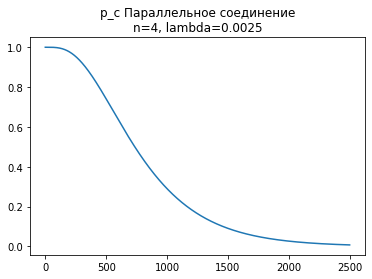

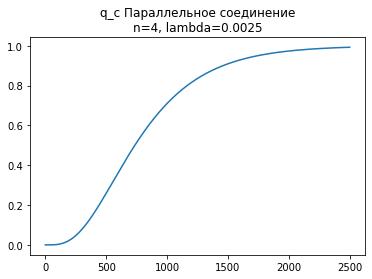

In [8]:
n = N[0]
lambda_ = Lambda[1]

funcs = calc_parallel(n, lambda_)

print(f"Среднее время безотказной работы: T_C={funcs['T_c']:.2f}")
plot(funcs["p_c"], funcs["T_c"] * 3, f"p_c Параллельное соединение\nn={n}, lambda={lambda_:.2}")
plot(funcs["q_c"], funcs["T_c"] * 3, f"q_c Параллельное соединение\nn={n}, lambda={lambda_:.2}")

Последовательное соединение.

n = 7

lambda = 1 / 300

Среднее время безотказной работы: T_C=42.86


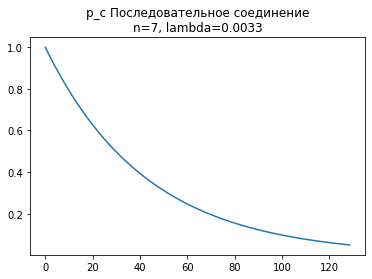

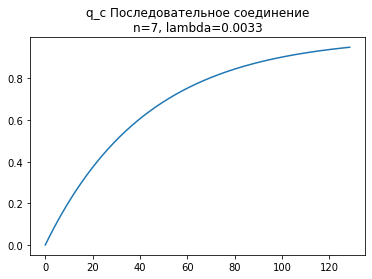

In [9]:
n = N[1]
lambda_ = Lambda[0]

funcs = calc_consistent(n, lambda_)

print(f"Среднее время безотказной работы: T_C={funcs['T_c']:.2f}")
plot(funcs["p_c"], funcs["T_c"] * 3, f"p_c Последовательное соединение\nn={n}, lambda={lambda_:.2}")
plot(funcs["q_c"], funcs["T_c"] * 3, f"q_c Последовательное соединение\nn={n}, lambda={lambda_:.2}")

Параллельное соединение.

n = 7

lambda = 1 / 300

Среднее время безотказной работы: T_C=777.86


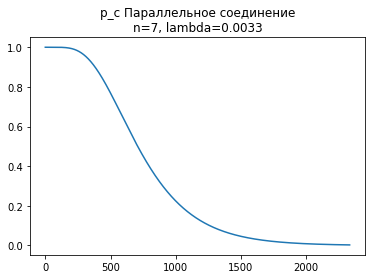

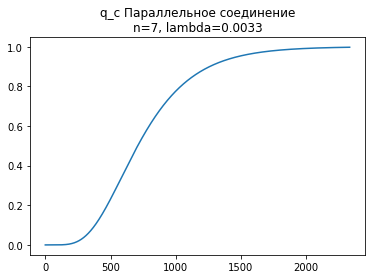

In [10]:
n = N[1]
lambda_ = Lambda[0]

funcs = calc_parallel(n, lambda_)

print(f"Среднее время безотказной работы: T_C={funcs['T_c']:.2f}")
plot(funcs["p_c"], funcs["T_c"] * 3, f"p_c Параллельное соединение\nn={n}, lambda={lambda_:.2}")
plot(funcs["q_c"], funcs["T_c"] * 3, f"q_c Параллельное соединение\nn={n}, lambda={lambda_:.2}")

Последовательное соединение.

n = 7

lambda = 1 / 400

Среднее время безотказной работы: T_C=57.14


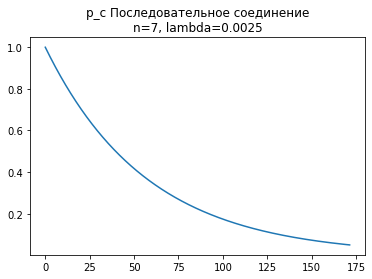

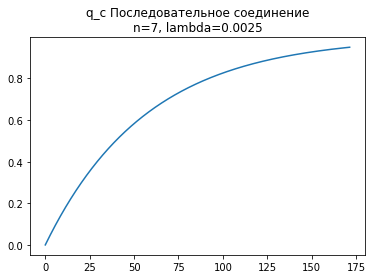

In [11]:
n = N[1]
lambda_ = Lambda[1]

funcs = calc_consistent(n, lambda_)

print(f"Среднее время безотказной работы: T_C={funcs['T_c']:.2f}")
plot(funcs["p_c"], funcs["T_c"] * 3, f"p_c Последовательное соединение\nn={n}, lambda={lambda_:.2}")
plot(funcs["q_c"], funcs["T_c"] * 3, f"q_c Последовательное соединение\nn={n}, lambda={lambda_:.2}")

Параллельное соединение.

n = 7

lambda = 1 / 400

Среднее время безотказной работы: T_C=1037.14


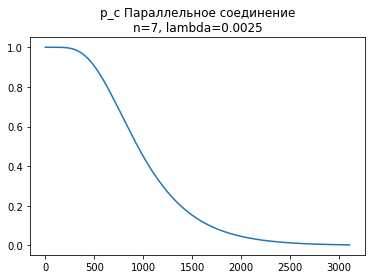

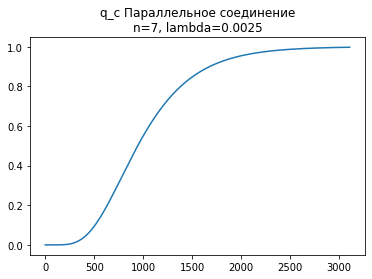

In [12]:
n = N[1]
lambda_ = Lambda[1]

funcs = calc_parallel(n, lambda_)

print(f"Среднее время безотказной работы: T_C={funcs['T_c']:.2f}")
plot(funcs["p_c"], funcs["T_c"] * 3, f"p_c Параллельное соединение\nn={n}, lambda={lambda_:.2}")
plot(funcs["q_c"], funcs["T_c"] * 3, f"q_c Параллельное соединение\nn={n}, lambda={lambda_:.2}")

Последовательное соединение.

n = 11

lambda = 1 / 300

Среднее время безотказной работы: T_C=27.27


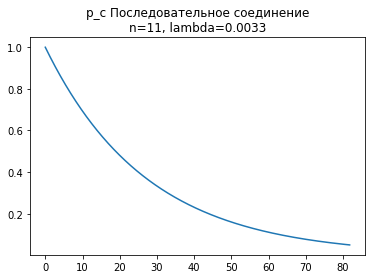

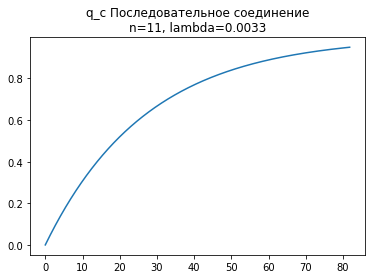

In [13]:
n = N[2]
lambda_ = Lambda[0]

funcs = calc_consistent(n, lambda_)

print(f"Среднее время безотказной работы: T_C={funcs['T_c']:.2f}")
plot(funcs["p_c"], funcs["T_c"] * 3, f"p_c Последовательное соединение\nn={n}, lambda={lambda_:.2}")
plot(funcs["q_c"], funcs["T_c"] * 3, f"q_c Последовательное соединение\nn={n}, lambda={lambda_:.2}")

Параллельное соединение.

n = 11

lambda = 1 / 300

Среднее время безотказной работы: T_C=905.96


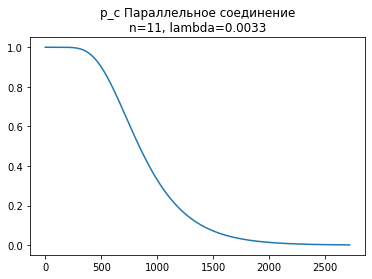

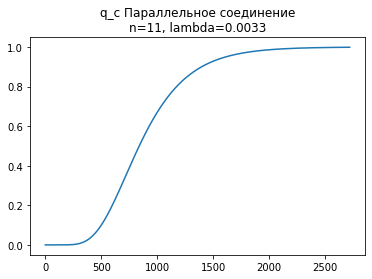

In [14]:
n = N[2]
lambda_ = Lambda[0]

funcs = calc_parallel(n, lambda_)

print(f"Среднее время безотказной работы: T_C={funcs['T_c']:.2f}")
plot(funcs["p_c"], funcs["T_c"] * 3, f"p_c Параллельное соединение\nn={n}, lambda={lambda_:.2}")
plot(funcs["q_c"], funcs["T_c"] * 3, f"q_c Параллельное соединение\nn={n}, lambda={lambda_:.2}")

Последовательное соединение.

n = 11

lambda = 1 / 400

Среднее время безотказной работы: T_C=36.36


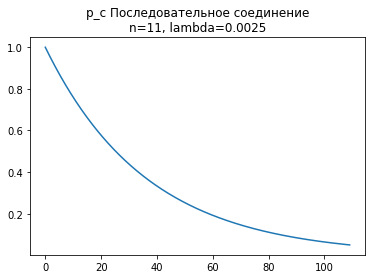

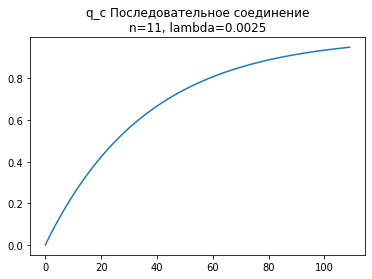

In [15]:
n = N[2]
lambda_ = Lambda[1]

funcs = calc_consistent(n, lambda_)

print(f"Среднее время безотказной работы: T_C={funcs['T_c']:.2f}")
plot(funcs["p_c"], funcs["T_c"] * 3, f"p_c Последовательное соединение\nn={n}, lambda={lambda_:.2}")
plot(funcs["q_c"], funcs["T_c"] * 3, f"q_c Последовательное соединение\nn={n}, lambda={lambda_:.2}")

Параллельное соединение.

n = 11

lambda = 1 / 400

Среднее время безотказной работы: T_C=1207.95


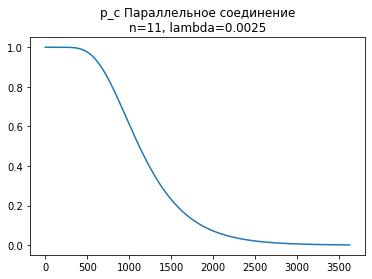

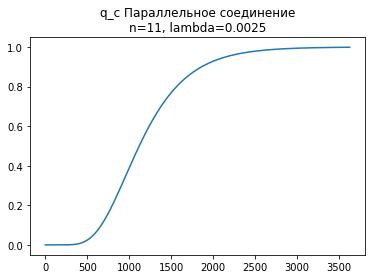

In [16]:
n = N[2]
lambda_ = Lambda[1]

funcs = calc_parallel(n, lambda_)

print(f"Среднее время безотказной работы: T_C={funcs['T_c']:.2f}")
plot(funcs["p_c"], funcs["T_c"] * 3, f"p_c Параллельное соединение\nn={n}, lambda={lambda_:.2}")
plot(funcs["q_c"], funcs["T_c"] * 3, f"q_c Параллельное соединение\nn={n}, lambda={lambda_:.2}")